In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("marketing_customer_analysis.csv")

In [3]:
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
print(df.shape)


(10910, 26)


In [5]:
df.columns = df.columns.str.lower()


In [6]:
df


,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [7]:
numerical_columns = df.select_dtypes(include=[int, float]).columns.tolist()
print('Numerical columns:', numerical_columns)

# names of columns that are categorical
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
print('Categorical columns:', categorical_columns)

Numerical columns: ['unnamed: 0', 'customer lifetime value', 'income', 'monthly premium auto', 'months since last claim', 'months since policy inception', 'number of open complaints', 'number of policies', 'total claim amount']
Categorical columns: ['customer', 'state', 'response', 'coverage', 'education', 'effective to date', 'employmentstatus', 'gender', 'location code', 'marital status', 'policy type', 'policy', 'renew offer type', 'sales channel', 'vehicle class', 'vehicle size', 'vehicle type']


In [8]:
df['income'].isnull().sum()

0

In [9]:
if df['customer'].nunique() == df.shape[0]:
    print("All values in 'name' column are unique")
else:
    print("There are duplicate values in 'name' column")


There are duplicate values in 'name' column


In [10]:
null_counts = df.isnull().sum()

In [11]:
null_counts


unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [12]:
null_pct = round(df.isnull().sum() / len(df) * 100,3)

In [13]:
null_pct

unnamed: 0                        0.000
customer                          0.000
state                             5.784
customer lifetime value           0.000
response                          5.784
coverage                          0.000
education                         0.000
effective to date                 0.000
employmentstatus                  0.000
gender                            0.000
income                            0.000
location code                     0.000
marital status                    0.000
monthly premium auto              0.000
months since last claim           5.802
months since policy inception     0.000
number of open complaints         5.802
number of policies                0.000
policy type                       0.000
policy                            0.000
renew offer type                  0.000
sales channel                     0.000
total claim amount                0.000
vehicle class                     5.701
vehicle size                      5.701


In [14]:
# for the numerical values i have used mode and median to deal with nan values
# for the object i have used mode to deal with nan values 
# and i have droped the vehicle type column as the nan value precentage of that column is more than 50%



In [15]:
mode = df['state'].mode()[0]
df['state'].fillna(mode, inplace=True)

In [16]:
mode1 = df['response'].mode()[0]
df['response'].fillna(mode1, inplace=True)

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
df

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [19]:
median_months = df['months since last claim'].median()

In [20]:
df['months since last claim'].fillna(median_months, inplace=True)


In [21]:
median_value = df['number of open complaints'].median()

In [22]:
df['number of open complaints'] = df['number of open complaints'].fillna(median_value)

In [23]:
df

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,14.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,14.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [24]:
mode_class = df['vehicle class'].mode()[0]
df['vehicle class'].fillna(mode_class, inplace=True)

In [25]:
mode_size = df['vehicle size'].mode()[0]
df['vehicle size'].fillna(mode_size, inplace=True)

In [26]:
df = df.drop('vehicle type', axis=1)

In [27]:
df

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,14.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,14.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [28]:
df['effective to date'] = pd.to_datetime(df['effective to date'])

In [29]:
df['month'] = df['effective to date'].dt.month

In [30]:
df

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,14.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,253,14.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


In [31]:
df_q1 = df[df['month'].isin([1, 2, 3])]

In [32]:
df_q1

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,14.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,253,14.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


In [33]:
df["month"].unique()

array([2, 1], dtype=int64)


import pandas as pd

def clean_data(df):
    # convert column names to lowercase
    df.columns = df.columns.str.lower()
    
    # get list of numerical columns
    numerical_columns = df.select_dtypes(include=[int, float]).columns.tolist()
    print('Numerical columns:', numerical_columns)

    # get list of categorical columns
    categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
    print('Categorical columns:', categorical_columns)

    # check for null values in 'income' column
    income_null_pct = round(df['income'].isnull().sum() / len(df) * 100, 3)
    print(f"Percentage of null values in 'income' column: {income_null_pct}%")

    # check for duplicate values in 'customer' column
    if df['customer'].nunique() == df.shape[0]:
        print("All values in 'customer' column are unique")
    else:
        print("There are duplicate values in 'customer' column")

    # fill null values in 'state' column with mode
    mode_state = df['state'].mode()[0]
    df['state'].fillna(mode_state, inplace=True)

    # fill null values in 'response' column with mode
    mode_response = df['response'].mode()[0]
    df['response'].fillna(mode_response, inplace=True)

    # fill null values in 'months since last claim' column with median
    median_months = df['months since last claim'].median()
    df['months since last claim'].fillna(median_months, inplace=True)

    # fill null values in 'number of open complaints' column with median
    median_complaints = df['number of open complaints'].median()
    df['number of open complaints'].fillna(median_complaints, inplace=True)

    # fill null values in 'vehicle class' column with mode
    mode_class = df['vehicle class'].mode()[0]
    df['vehicle class'].fillna(mode_class, inplace=True)

    # fill null values in 'vehicle size' column with mode
    mode_size = df['vehicle size'].mode()[0]
    df['vehicle size'].fillna(mode_size, inplace=True)

    # drop 'vehicle type' column
    df.drop('vehicle type', axis=1, inplace=True)

    # convert 'effective to date' column to datetime and extract month
    df['effective to date'] = pd.to_datetime(df['effective to date'])
    df['month'] = df['effective to date'].dt.month

    # filter data for first quarter (Jan, Feb, Mar)
    df_q1 = df[df['month'].isin([1, 2, 3])]
    
    # return cleaned dataframe for first quarter
    return df_q1


In [34]:
#df = pd.read_csv("marketing_customer_analysis.csv")

In [35]:
df.info

<bound method DataFrame.info of        unnamed: 0 customer       state  customer lifetime value response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877  California              6857.519928       No   

       coverage education effective to date employments

In [36]:
df.describe()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.082401,48.091934,0.361962,2.979193,434.888330,1.466728
std,3149.590053,6885.081434,30359.195670,34.442532,9.787208,27.940675,0.890134,2.399359,292.180556,0.498915
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
counts = df['response'].value_counts()

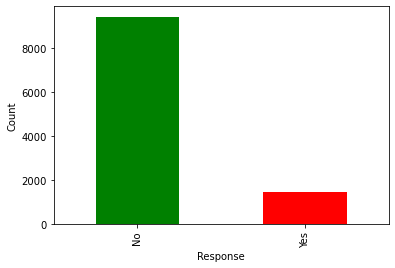

In [39]:
ax = counts.plot(kind='bar', color=['green', 'red'])
ax.set_xlabel('Response')
ax.set_ylabel('Count')
plt.show()

In [40]:
response_rates = df.groupby('sales channel')['response'].apply(lambda x: (x == 'Yes').mean())

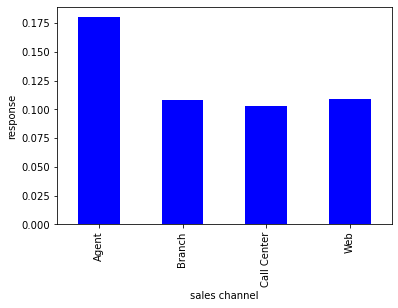

In [41]:
ax = response_rates.plot(kind='bar', color='blue')
ax.set_xlabel('sales channel')
ax.set_ylabel('response')
plt.show()

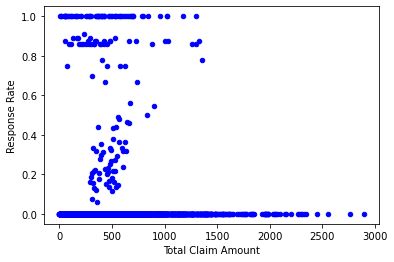

In [42]:
response_rates_2 = df.groupby('total claim amount')['response'].apply(lambda x: (x == 'Yes').mean()).reset_index()

ax = response_rates_2.plot(kind='scatter', x='total claim amount', y='response', color='blue')
ax.set_xlabel('Total Claim Amount')
ax.set_ylabel('Response Rate')
plt.show()

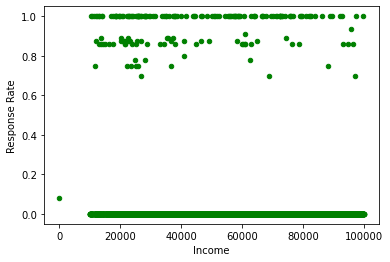

In [43]:
response_rates_3 = df.groupby('income')['response'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# create a scatter plot of the response rates
ax = response_rates_3.plot(kind='scatter', x='income', y='response', color='green')
ax.set_xlabel('Income')
ax.set_ylabel('Response Rate')
plt.show()

In [44]:
df.dtypes


unnamed: 0                                int64
customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                        

In [45]:
# Select numerical columns
numerical = df.select_dtypes(include=np.number)

# Select categorical columns
categoricals = df.select_dtypes(include=np.object)


C:\Users\Dell\AppData\Local\Temp/ipykernel_16336/2489019255.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = df.select_dtypes(include=np.object)


In [46]:
numerical =numerical.drop('unnamed: 0', axis=1)

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

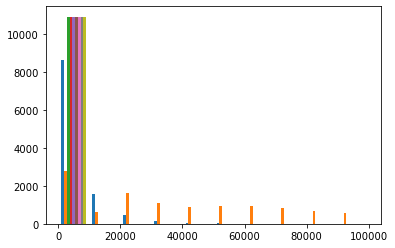

In [49]:
plt.hist(numerical);

In [50]:
numerical.shape


(10910, 9)

In [51]:
numerical.columns



Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'total claim amount',
       'month'],
      dtype='object')

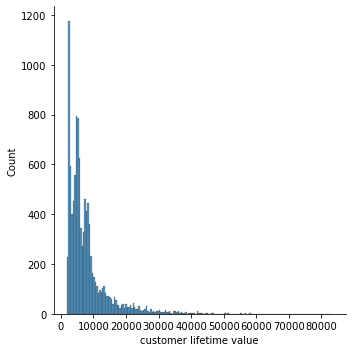

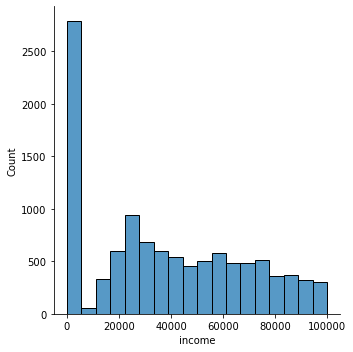

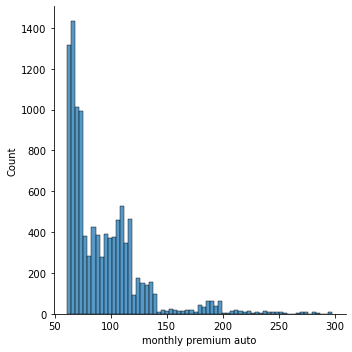

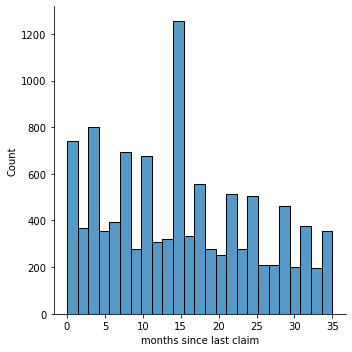

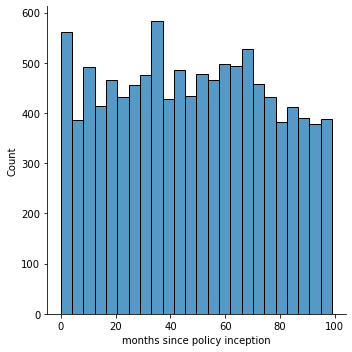

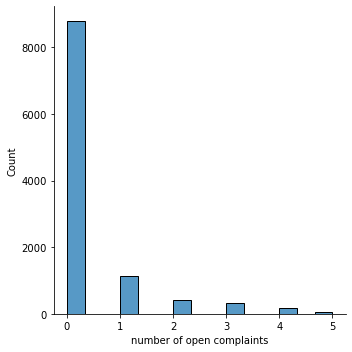

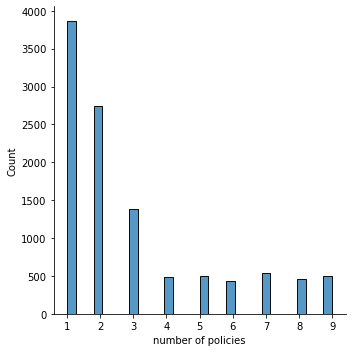

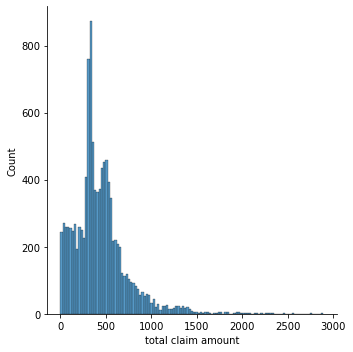

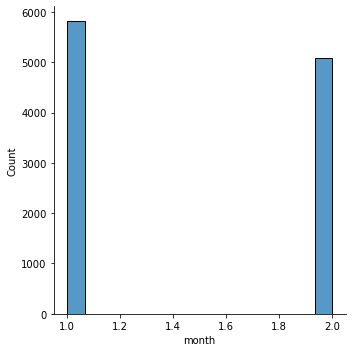

In [52]:
for col in numerical:
    sns.displot(data=numerical, x=col)
    plt.show()

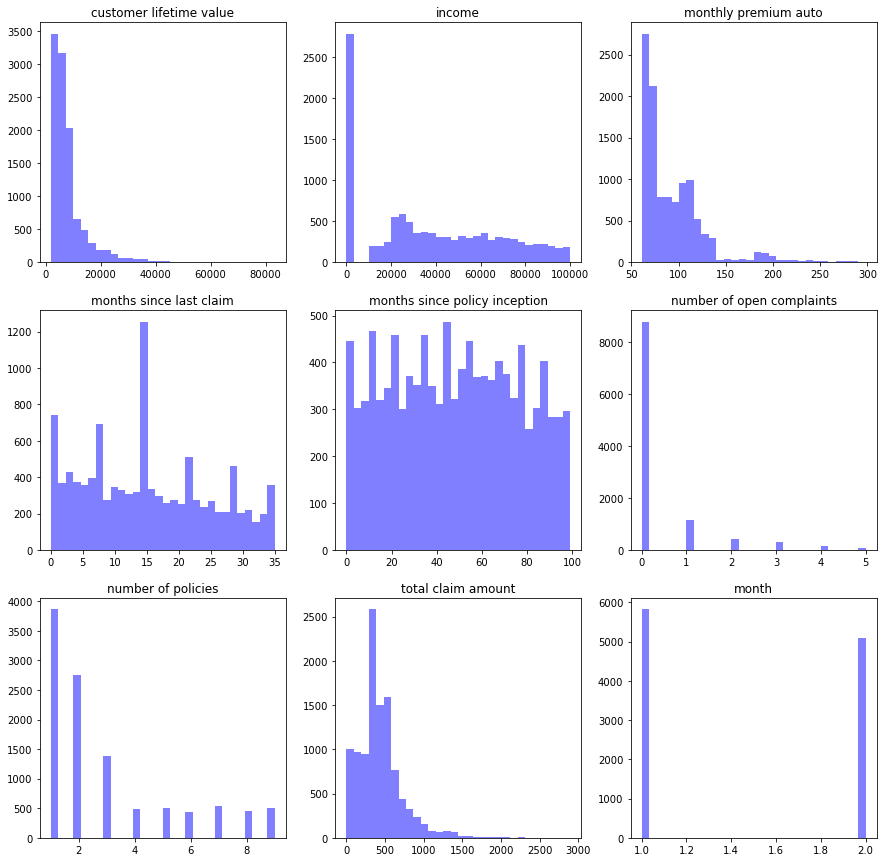

In [53]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    axes[i].hist(numerical[col], bins=30, alpha=0.5, color='blue')
    axes[i].set_title(col)

In [54]:
corr_matrix = numerical.corr()
corr_matrix = np.round(corr_matrix,2)

<AxesSubplot:>

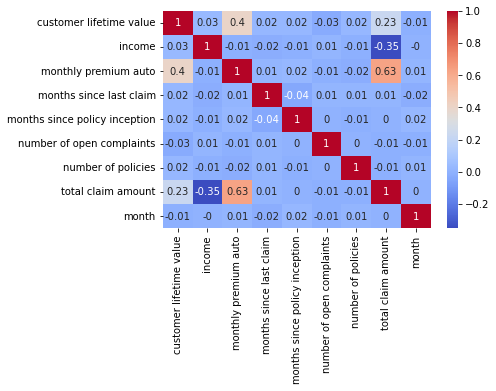

In [55]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [59]:
df

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,14.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,253,14.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


In [61]:
# selected my preferred numerical columns as input features due to the result on the heatmap
X = df[['customer lifetime value',  'monthly premium auto', 'months since policy inception']]

# select the target variable
y = df['total claim amount']

In [66]:
from sklearn.preprocessing import StandardScaler
cols_to_normalize = ['customer lifetime value', 'monthly premium auto', 'months since policy inception', 'total claim amount']

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the selected columns
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# create a new DataFrame with the normalized columns
normalized_df = df[cols_to_normalize]

In [67]:
normalized_df

,customer lifetime value,monthly premium auto,months since policy inception,total claim amount
0,-0.466105,-0.934819,0.139877,-0.486325
1,-0.840946,-0.847713,-0.790709,1.061160
2,1.006523,0.197554,-0.611750,0.154404
3,2.079112,0.110448,-1.613919,0.168140
4,0.146240,0.691152,-0.611750,0.934524
...,...,...,...,...
10905,1.095916,4.639940,-0.289625,2.668033
10906,-0.400710,-0.818678,0.712545,-0.554030
10907,2.305825,3.130109,0.533586,-0.183393
10908,0.574273,1.881595,-0.754917,0.627725


In [69]:
X = normalized_df[['customer lifetime value',  'monthly premium auto', 'months since policy inception']]

# select the target variable
y = normalized_df['total claim amount']

In [85]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# selected the categorical columns I want to encode
cols_to_encode = ['marital status', 'gender']

# create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# fit the encoder to the selected columns
encoder.fit(categoricals[cols_to_encode])

# transform the selected columns using the encoder
encoded = encoder.transform(categoricals[cols_to_encode])

# create a new DataFrame containing the encoded columns
onehot_encoded = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names(cols_to_encode))

# concatenate the original DataFrame with the encoded DataFrame
#concatenated_df = pd.concat([categoricals, encoded_df], axis=1)

In [87]:
onehot_encoded = onehot_encoded.drop(['gender_F', 'marital status_Single'],axis = 1)
onehot_encoded

,marital status_Divorced,marital status_Married,gender_M
0,0.0,1.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
10905,0.0,1.0,0.0
10906,0.0,1.0,0.0
10907,0.0,1.0,0.0
10908,1.0,0.0,0.0


In [88]:
X = pd.concat([normalized_df, onehot_encoded], axis=1)
X

,customer lifetime value,monthly premium auto,months since policy inception,total claim amount,marital status_Divorced,marital status_Married,gender_M
0,-0.466105,-0.934819,0.139877,-0.486325,0.0,1.0,1.0
1,-0.840946,-0.847713,-0.790709,1.061160,0.0,0.0,0.0
2,1.006523,0.197554,-0.611750,0.154404,0.0,0.0,1.0
3,2.079112,0.110448,-1.613919,0.168140,0.0,0.0,1.0
4,0.146240,0.691152,-0.611750,0.934524,0.0,1.0,0.0
...,...,...,...,...,...,...,...
10905,1.095916,4.639940,-0.289625,2.668033,0.0,1.0,0.0
10906,-0.400710,-0.818678,0.712545,-0.554030,0.0,1.0,0.0
10907,2.305825,3.130109,0.533586,-0.183393,0.0,1.0,0.0
10908,0.574273,1.881595,-0.754917,0.627725,1.0,0.0,0.0


In [90]:
y = X['total claim amount']
y

0       -0.486325
1        1.061160
2        0.154404
3        0.168140
4        0.934524
           ...   
10905    2.668033
10906   -0.554030
10907   -0.183393
10908    0.627725
10909    2.008546
Name: total claim amount, Length: 10910, dtype: float64

In [92]:
X  = X.drop(['total claim amount'],axis = 1)
X


,customer lifetime value,monthly premium auto,months since policy inception,marital status_Divorced,marital status_Married,gender_M
0,-0.466105,-0.934819,0.139877,0.0,1.0,1.0
1,-0.840946,-0.847713,-0.790709,0.0,0.0,0.0
2,1.006523,0.197554,-0.611750,0.0,0.0,1.0
3,2.079112,0.110448,-1.613919,0.0,0.0,1.0
4,0.146240,0.691152,-0.611750,0.0,1.0,0.0
...,...,...,...,...,...,...
10905,1.095916,4.639940,-0.289625,0.0,1.0,0.0
10906,-0.400710,-0.818678,0.712545,0.0,1.0,0.0
10907,2.305825,3.130109,0.533586,0.0,1.0,0.0
10908,0.574273,1.881595,-0.754917,1.0,0.0,0.0


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8728, 6)
(2182, 6)
(8728,)
(2182,)


In [94]:

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [95]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [96]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)


0.46939447032795534

In [97]:
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.46095427541496037

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

print("R2 score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
